In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
path = '/content/drive/MyDrive/Sem-7 Books/EE4708/Assignment-2/' ### CHANGE TO PATH OF DATASETS TO RUN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
### PRINTING ALL UNIQUE VALUES IN EACH COLUMN
for i in df.columns:
  print(i, df[i].nunique())
  print(df[i].unique())
  print("--------------")

PassengerId 891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 24

In [6]:
# PERCENTAGE OF MISSING VALUES
df.isna().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
## SURVIVAL STATUS WISE MEANS FOR EACH FEATURE
df.groupby('Survived').agg('mean').drop('PassengerId', axis= 1)

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
### NEW FEATURE: FAMILY SIZE
df['family_size'] = df['SibSp'] + df['Parch']+1

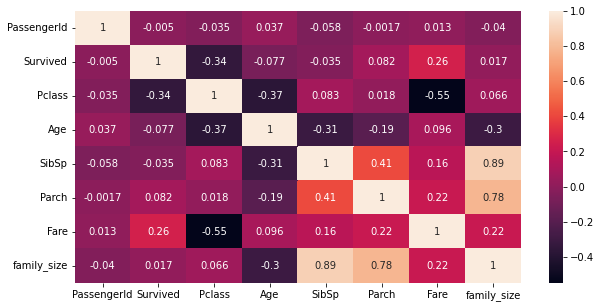

In [9]:
### CORRELATION MATRIX AMONG ALL FEATURES
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


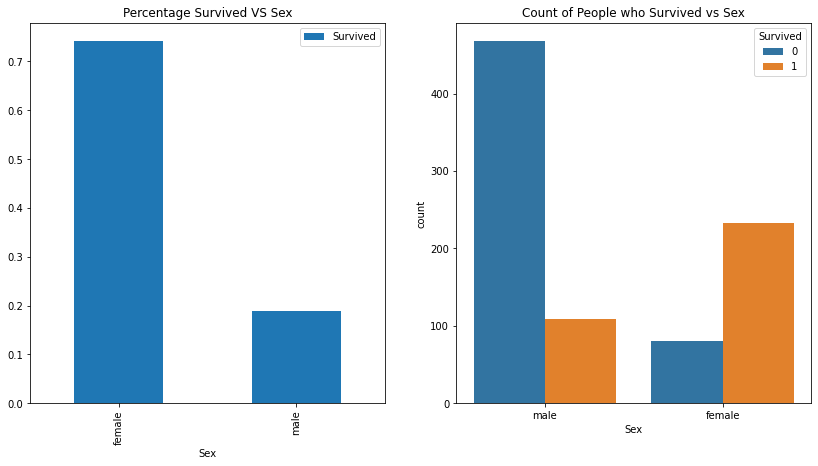

In [10]:
### Percentage Survived VS Sex
f, ax = plt.subplots(1, 2, figsize=(14,7))
data = df
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Percentage Survived VS Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Count of People who Survived vs Sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


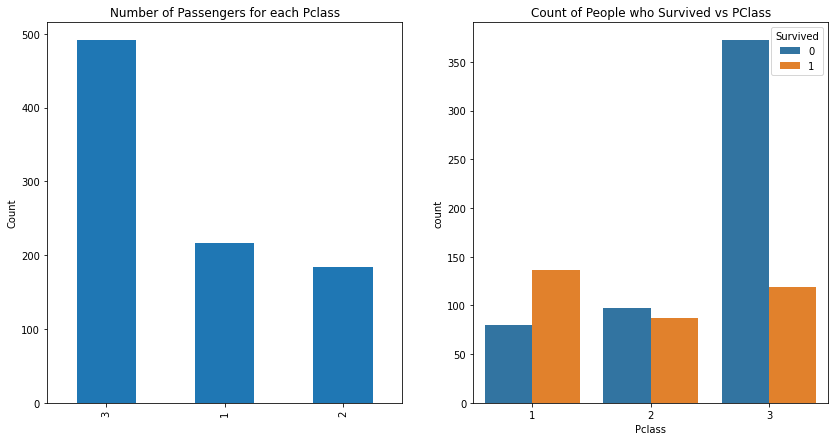

In [11]:
### Count of People who Survived vs PClass
f, ax = plt.subplots(1, 2, figsize=(14,7))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers for each Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Count of People who Survived vs PClass')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


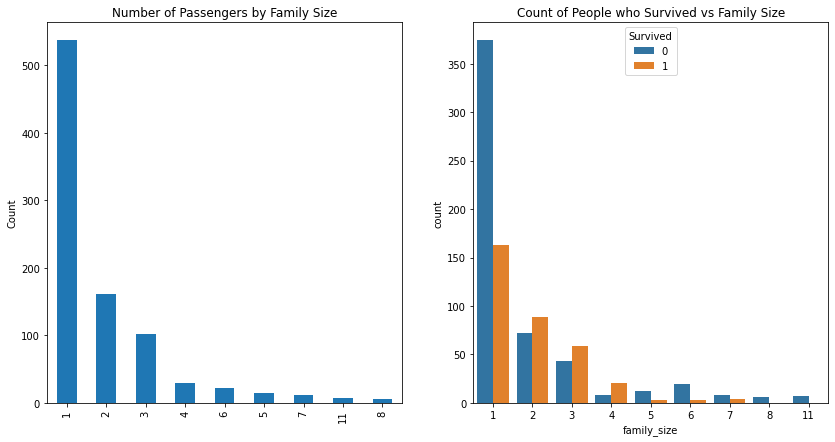

In [12]:
### Count of People who Survived vs Family Size
f, ax = plt.subplots(1, 2, figsize=(14,7))
data['family_size'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Family Size')
ax[0].set_ylabel('Count')
sns.countplot('family_size', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Count of People who Survived vs Family Size')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


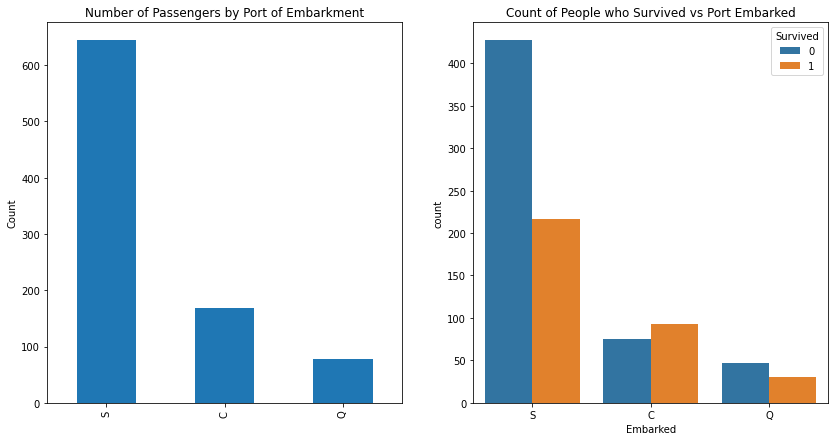

In [13]:
### Count of People who Survived vs Port Embarked
f, ax = plt.subplots(1, 2, figsize=(14,7))
data['Embarked'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Port of Embarkment')
ax[0].set_ylabel('Count')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Count of People who Survived vs Port Embarked')
plt.show()

Mean Fare of Passengers who did not Survive:  22.117886885245877
Mean Fare of Passengers who Survived:  48.39540760233917


Text(0.5, 1.0, 'Fare of Passengers by survival status')

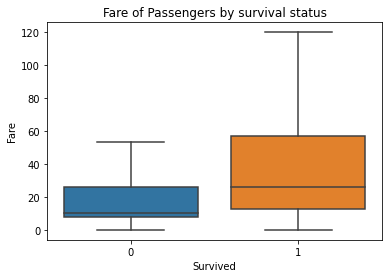

In [14]:
## Fare of Passengers vs survival status
print("Mean Fare of Passengers who did not Survive: ", data.loc[data['Survived']==0,'Fare'].mean())
print("Mean Fare of Passengers who Survived: ", data.loc[data['Survived']==1,'Fare'].mean())
sns.boxplot(x='Survived', y='Fare', data=data, showfliers=False)
plt.title('Fare of Passengers by survival status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean Age of Passengers who did not Survive:  30.62617924528302
Mean Age of Passengers who Survived:  28.343689655172415


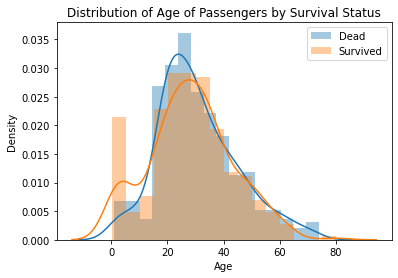

In [15]:
# Distribution of Age of Passengers by Survival Status
ax = sns.distplot(data.loc[data['Survived']==0,'Age'], label="Dead")
sns.distplot(data.loc[data['Survived']==1,'Age'], ax=ax, label="Survived")
plt.title("Distribution of Age of Passengers by Survival Status")
plt.legend()
print("Mean Age of Passengers who did not Survive: ", data.loc[data['Survived']==0,'Age'].mean())
print("Mean Age of Passengers who Survived: ", data.loc[data['Survived']==1,'Age'].mean())

# Cleaning and Modelling

In [16]:
df.columns, test.columns
test['family_size']=test['SibSp']+test['Parch']+1

In [17]:
### DROPPING FEATURE CABIN AND MISSING VALUES
df1 = df.drop(['Cabin'], axis=1)
test1 = test.drop(['Cabin'], axis=1)
df1.dropna(inplace=True)
test1.dropna(inplace=True)

In [18]:
### DROPPING OTHER COLUMNS
drop_cols = ['PassengerId', 'Name', 'Ticket']
## There are 541 Tickets and 712 passengers, therefore too many unique values
df1.drop(drop_cols, axis=1, inplace=True)
test1.drop(drop_cols, axis=1, inplace=True)

In [19]:
## LABEL ENCODING CATEGORICAL FEATURES
embarked_dict = {'S':0, 'C':1, 'Q':2}
gender_dict = {'male':0, 'female':1}
df2 = df1.replace({"Sex": gender_dict, "Embarked":embarked_dict})
test2 = test1.replace({"Sex": gender_dict, "Embarked":embarked_dict})

In [20]:
# BUILDING MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df2.drop(['Survived', 'Parch', 'SibSp'], axis=1)
test3 = test2.drop(['Parch', 'SibSp'], axis=1)
y = df2['Survived']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_val)
clf.score(X_val, y_val)

0.7902097902097902

In [21]:
## PERFORMANCE ON VAL SET
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        85
           1       0.73      0.76      0.75        58

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143



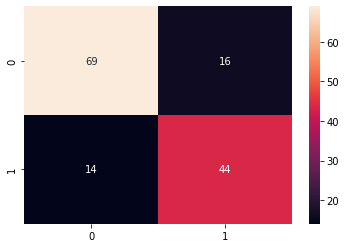

In [22]:
### vISUALIZING PERFORMANCE
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)

In [23]:
predictions = clf.predict(test3)
test2['predictions']=predictions
test2[['predictions']].to_csv("predictions.csv")